IMPORT LIBRARY

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


INPUT DATA SET

In [36]:
df = pd.read_csv('diabetes.csv')

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [40]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [41]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [42]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


MELAKUKAN SCALING DATA SET

In [43]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
print(x_train_scaled)

[[0.52941176 0.44723618 0.50819672 ... 0.33532042 0.02732707 0.2       ]
 [0.05882353 0.59296482 0.47540984 ... 0.49627422 0.07813834 0.03333333]
 [0.         0.45728643 0.6557377  ... 0.4828614  0.22331341 0.1       ]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]


In [45]:
print(x_test_scaled)

[[0.05882353 1.         0.62295082 ... 0.63934426 0.56191289 0.01666667]
 [0.11764706 0.53768844 0.60655738 ... 0.50074516 0.13919727 0.03333333]
 [0.23529412 0.38190955 0.50819672 ... 0.50670641 0.13364646 0.06666667]
 ...
 [0.05882353 0.54773869 0.49180328 ... 0.37853949 0.37105038 0.        ]
 [0.17647059 0.64321608 0.63934426 ... 0.31445604 0.08112724 0.56666667]
 [0.29411765 0.44221106 0.63934426 ... 0.41132638 0.07685739 0.26666667]]


MEMBUAT VISUALISASI  DATA

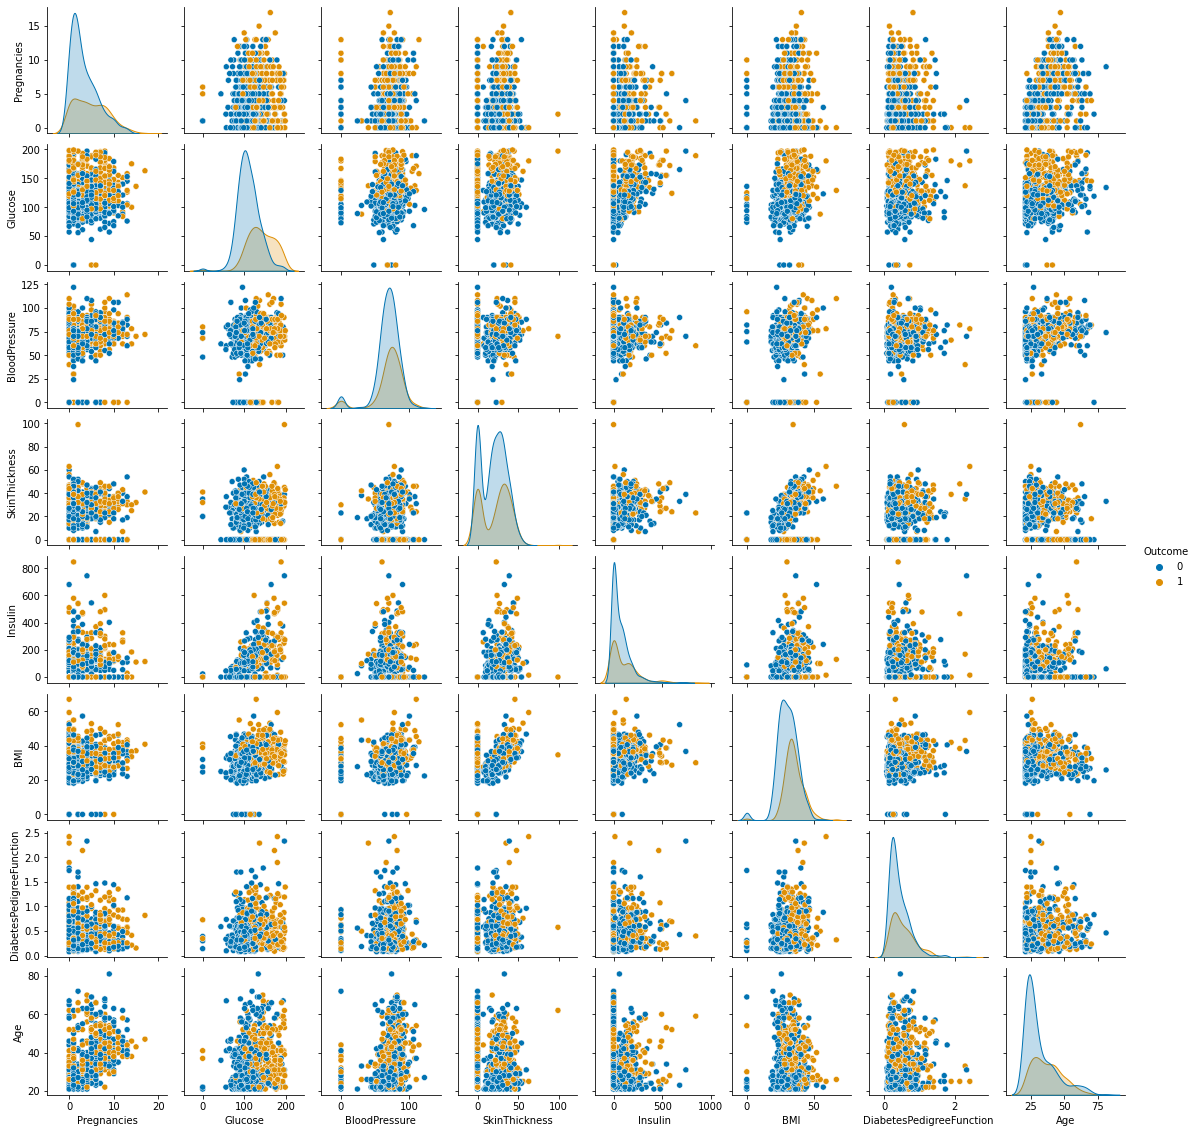

In [46]:
sns.pairplot(df,hue='Outcome',height=2,palette='colorblind');

MEMBAGI DATASET KE DATA TRAINING DAN DATA TESTING

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
m1 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
acc1 = m1.score(x_test,y_test)
print(acc1)

0.6979166666666666


In [49]:
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors=3).fit(x_train_scaled,y_train)
acc1 = m2.score(x_test_scaled,y_test)
print(acc1)

0.7552083333333334


In [50]:
print(x_train_scaled)

[[0.52941176 0.44723618 0.50819672 ... 0.33532042 0.02732707 0.2       ]
 [0.05882353 0.59296482 0.47540984 ... 0.49627422 0.07813834 0.03333333]
 [0.         0.45728643 0.6557377  ... 0.4828614  0.22331341 0.1       ]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]


In [51]:
len(x_train_scaled)

576

In [52]:
len(x)

768

In [53]:
len(x_test_scaled)

192

In [54]:
print(y_train)

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64


In [55]:
len(y_train)

576

In [56]:
len(y_test)

192

PENENTUAN NILAI K YANG OPTIMAL

In [61]:
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train_scaled)
    pred_i = knn.predict(x_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
print("Minimum Error =",min(error_rate),"Dengan Menggunakan Nilai K =",error_rate.index(min(error_rate)))

Minimum Error = 0.21875 Dengan Menggunakan Nilai K = 8


In [63]:
# Melihat Nilai Error pada Setiap Nilai Knya

error = []
epen = []

# Mengkalkulasi error untuk Nilai K antara 1 dan 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    emen = np.mean(pred_i != y_test)
    epen = error.append(emen)
    
    # epmen = statistics.mean(error)
    print(i, emen)

1 0.328125
2 0.2708333333333333
3 0.24479166666666666
4 0.2708333333333333
5 0.24479166666666666
6 0.2552083333333333
7 0.234375
8 0.24479166666666666
9 0.21875
10 0.24479166666666666
11 0.22916666666666666
12 0.22916666666666666
13 0.22395833333333334
14 0.234375


In [64]:
# Menampilkan Akurasi dari Setiap Nilai K

score = []
# Grafik Akurasi
for n in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_scaled, y_train)
    knnscore = knn.score(x_test_scaled, y_test)
    sken = score.append(knnscore)
    print(n,knnscore)

1 0.671875
2 0.7291666666666666
3 0.7552083333333334
4 0.7291666666666666
5 0.7552083333333334
6 0.7447916666666666
7 0.765625
8 0.7552083333333334
9 0.78125
10 0.7552083333333334
11 0.7708333333333334
12 0.7708333333333334
13 0.7760416666666666
14 0.765625


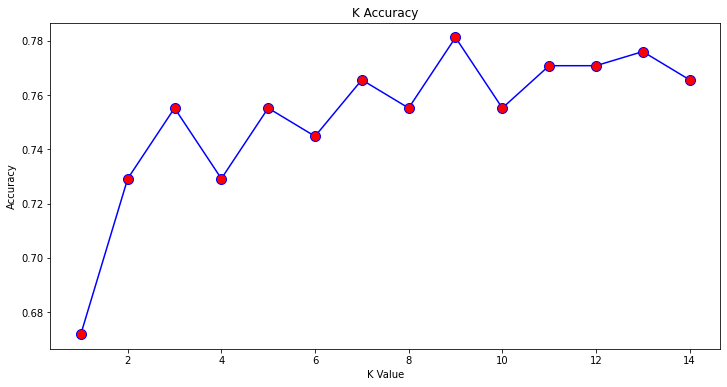

In [65]:
# Menampilkan Grafik Akurasi dari Setiap Nilai K

plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), score, color='blue', linestyle='-', marker='o', markerfacecolor='red', markersize=10)
plt.title('K Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

MEMANGGIL FUNCTION KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scaled,y_train_scaled)

KNeighborsClassifier(n_neighbors=9)

MENENTUKAN PREDIKSI

In [67]:
y_pred = knn.predict(x_test_scaled)

EVALUASI DAN VALIDASI

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[116  14]
 [ 28  34]]


In [69]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.55      0.62        62

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [70]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi = %d persen"%(akurasi*100))

Tingkat Akurasi = 78 persen
